# Exemple RandomForest avec dataset Titanic

Usage du dataset *titanic* pour illustrer l'usage des ***Random Forest***.

On commence par placer tous les imports dans un même bloc au tout début. 

In [318]:
import pandas as pnd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier


## Lecture et Cleaning

Première étape : lecture du dataset et nettoyage des données. 

In [319]:
titanic = pnd.read_csv('http://www.kirschpm.fr/cours/PythonDataScience/files/TitanicSurvival.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1309 non-null   object 
 1   survived        1309 non-null   object 
 2   sex             1309 non-null   object 
 3   age             1046 non-null   float64
 4   passengerClass  1309 non-null   object 
dtypes: float64(1), object(4)
memory usage: 51.3+ KB


In [320]:
titanic.head(15)

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st
5,"Anderson, Mr. Harry",yes,male,48.00,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.00,1st
7,"Andrews, Mr. Thomas Jr",no,male,39.00,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.00,1st
9,"Artagaveytia, Mr. Ramon",no,male,71.00,1st


On va réduire la précision (pour mieux visualiser l'age) et renomer la première colonne. 

In [321]:
pnd.set_option('precision', 2)
titanic.rename(columns={'Unnamed: 0':'passenger'}, inplace=True)
titanic.head(10)

,passenger,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st
5,"Anderson, Mr. Harry",yes,male,48.00,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.00,1st
7,"Andrews, Mr. Thomas Jr",no,male,39.00,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.00,1st
9,"Artagaveytia, Mr. Ramon",no,male,71.00,1st


maintenant, on peut remplir les ages NA avec l'age moyenne (on aurait pu les supprimer aussi). 

In [322]:
titanic.describe()

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [323]:
titanic['age'].fillna (titanic['age'].mean(),inplace=True)
titanic['age'].describe()

count    1309.00
mean       29.88
std        12.88
min         0.17
25%        22.00
50%        29.88
75%        35.00
max        80.00
Name: age, dtype: float64

On va transformer les valeurs texte des colonnes survived, sex et passenferclass en valeurs numériques. 

In [324]:
titanic = pnd.get_dummies (titanic, columns=['survived','sex'], drop_first=True)
titanic.head(10)

,passenger,age,passengerClass,survived_yes,sex_male
0,"Allen, Miss. Elisabeth Walton",29.00,1st,1,0
1,"Allison, Master. Hudson Trevor",0.92,1st,1,1
2,"Allison, Miss. Helen Loraine",2.00,1st,0,0
3,"Allison, Mr. Hudson Joshua Crei",30.00,1st,0,1
4,"Allison, Mrs. Hudson J C (Bessi",25.00,1st,0,0
5,"Anderson, Mr. Harry",48.00,1st,1,1
6,"Andrews, Miss. Kornelia Theodos",63.00,1st,1,0
7,"Andrews, Mr. Thomas Jr",39.00,1st,0,1
8,"Appleton, Mrs. Edward Dale (Cha",53.00,1st,1,0
9,"Artagaveytia, Mr. Ramon",71.00,1st,0,1


In [325]:
titanic = pnd.get_dummies (titanic, columns=['passengerClass'])
titanic.sample(15)

,passenger,age,survived_yes,sex_male,passengerClass_1st,passengerClass_2nd,passengerClass_3rd
873,"Humblen, Mr. Adolf Mathias Nico",42.00,0,1,0,0,1
92,"Dick, Mrs. Albert Adrian (Vera",17.00,1,0,1,0,0
1140,"Reynolds, Mr. Harold J",21.00,0,1,0,0,1
443,"Hickman, Mr. Lewis",32.00,0,1,0,1,0
968,"Lindell, Mr. Edvard Bengtsson",36.00,0,1,0,0,1
1031,"Morley, Mr. William",34.00,0,1,0,0,1
871,"Horgan, Mr. John",29.88,0,1,0,0,1
246,"Rothschild, Mr. Martin",55.00,0,1,1,0,0
816,"Gheorgheff, Mr. Stanio",29.88,0,1,0,0,1
571,"Troupiansky, Mr. Moses Aaron",23.00,0,1,0,1,0


In [326]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passenger           1309 non-null   object 
 1   age                 1309 non-null   float64
 2   survived_yes        1309 non-null   uint8  
 3   sex_male            1309 non-null   uint8  
 4   passengerClass_1st  1309 non-null   uint8  
 5   passengerClass_2nd  1309 non-null   uint8  
 6   passengerClass_3rd  1309 non-null   uint8  
dtypes: float64(1), object(1), uint8(5)
memory usage: 27.0+ KB


In [327]:
titanic.groupby('survived_yes').size()

survived_yes
0    809
1    500
dtype: int64

## Séparation X & Y, Training & Test
Sélection des features et séparation de notre dataset en test et training. 

In [328]:
train_titanic, test_titanic = train_test_split (titanic, test_size=0.3, stratify=titanic['survived_yes'])
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 572 to 501
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passenger           916 non-null    object 
 1   age                 916 non-null    float64
 2   survived_yes        916 non-null    uint8  
 3   sex_male            916 non-null    uint8  
 4   passengerClass_1st  916 non-null    uint8  
 5   passengerClass_2nd  916 non-null    uint8  
 6   passengerClass_3rd  916 non-null    uint8  
dtypes: float64(1), object(1), uint8(5)
memory usage: 25.9+ KB


In [329]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 918 to 1069
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passenger           393 non-null    object 
 1   age                 393 non-null    float64
 2   survived_yes        393 non-null    uint8  
 3   sex_male            393 non-null    uint8  
 4   passengerClass_1st  393 non-null    uint8  
 5   passengerClass_2nd  393 non-null    uint8  
 6   passengerClass_3rd  393 non-null    uint8  
dtypes: float64(1), object(1), uint8(5)
memory usage: 11.1+ KB


On vérifie la distribution des classes...

In [330]:
train_titanic.groupby('survived_yes').size()

survived_yes
0    566
1    350
dtype: int64

In [331]:
test_titanic.groupby('survived_yes').size()

survived_yes
0    243
1    150
dtype: int64

In [332]:
features_names = ['age','sex_male','passengerClass_1st','passengerClass_2nd','passengerClass_3rd']
features_names

['age',
 'sex_male',
 'passengerClass_1st',
 'passengerClass_2nd',
 'passengerClass_3rd']

In [333]:
X_train = train_titanic[features_names]
X_test = test_titanic[features_names]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 918 to 1069
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 393 non-null    float64
 1   sex_male            393 non-null    uint8  
 2   passengerClass_1st  393 non-null    uint8  
 3   passengerClass_2nd  393 non-null    uint8  
 4   passengerClass_3rd  393 non-null    uint8  
dtypes: float64(1), uint8(4)
memory usage: 7.7 KB


In [334]:
Y_train = train_titanic['survived_yes']
Y_test = test_titanic['survived_yes']
Y_train[15:30]

991     1
256     1
1042    1
761     0
813     0
177     1
1293    0
682     0
951     0
568     0
694     0
222     0
599     0
1123    1
206     0
Name: survived_yes, dtype: uint8

## Création des modèles

### Arbre de décision simple

Au début, on va créer une simple **arbre de décision**, puis on pourra comparer les résultats de ce modèle aux modèles avec **Random Forest**. 


In [335]:
max_depth = 4

arbre = DecisionTreeClassifier(max_depth=max_depth)
arbre.fit (X_train, Y_train)

for f,i in zip(features_names, arbre.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))

# on peut aussi visualiser en utilisant un DataFrame
#pnd.DataFrame({'feature' : features_names,
#               'importance' : arbre.feature_importances_ })


 age : 0.1132 
 sex_male : 0.6832 
 passengerClass_1st : 0.0409 
 passengerClass_2nd : 0.0027 
 passengerClass_3rd : 0.1600 


In [336]:
pred_arbre = arbre.predict(X_test)

In [337]:
print (confusion_matrix (Y_test, pred_arbre))


[[200  43]
 [ 45 105]]


In [338]:
print (classification_report(Y_test, pred_arbre))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       243
           1       0.71      0.70      0.70       150

    accuracy                           0.78       393
   macro avg       0.76      0.76      0.76       393
weighted avg       0.78      0.78      0.78       393



In [339]:
ac = accuracy_score (Y_test, pred_arbre)
pr = precision_score (Y_test, pred_arbre, average='weighted')
re = recall_score (Y_test, pred_arbre, average='weighted')

print ("Accuracy = {acc:.2f}\
        Precision = {prec:.2f}\
        Recall = {rec:.2f}".format(acc = ac, prec = pr, rec = re))

Accuracy = 0.78        Precision = 0.78        Recall = 0.78


[Text(283.98214285714283, 391.392, 'sex_male <= 0.5\ngini = 0.472\nsamples = 916\nvalue = [566, 350]\nclass = No'),
 Text(159.42857142857142, 304.416, 'passengerClass_3rd <= 0.5\ngini = 0.378\nsamples = 316\nvalue = [80, 236]\nclass = Yes'),
 Text(79.71428571428571, 217.44, 'passengerClass_2nd <= 0.5\ngini = 0.131\nsamples = 170\nvalue = [12, 158]\nclass = Yes'),
 Text(39.857142857142854, 130.464, 'age <= 62.5\ngini = 0.075\nsamples = 102\nvalue = [4, 98]\nclass = Yes'),
 Text(19.928571428571427, 43.488, 'gini = 0.059\nsamples = 98\nvalue = [3, 95]\nclass = Yes'),
 Text(59.78571428571428, 43.488, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Yes'),
 Text(119.57142857142856, 130.464, 'age <= 57.5\ngini = 0.208\nsamples = 68\nvalue = [8, 60]\nclass = Yes'),
 Text(99.64285714285714, 43.488, 'gini = 0.187\nsamples = 67\nvalue = [7, 60]\nclass = Yes'),
 Text(139.5, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(239.1428571428571, 217.44, 'age <= 5.5\ngini = 0.49

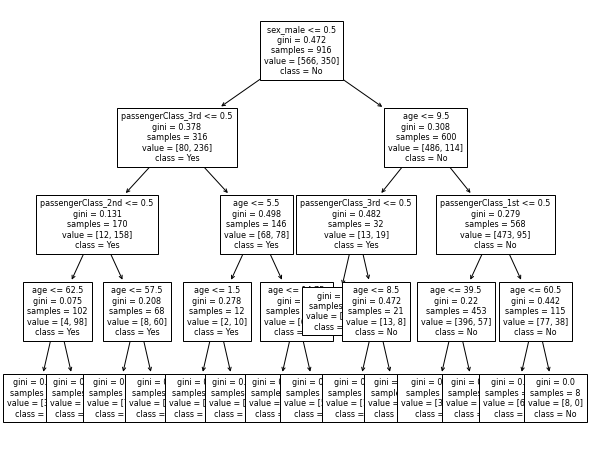

In [340]:
%matplotlib inline
plt.figure(figsize=(10,8))

plot_tree(arbre, feature_names=features_names, 
          class_names=['No','Yes'], fontsize=8)

In [341]:
print (export_text(arbre, feature_names=features_names, 
                spacing=3, decimals=2))

|--- sex_male <= 0.50
|   |--- passengerClass_3rd <= 0.50
|   |   |--- passengerClass_2nd <= 0.50
|   |   |   |--- age <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  62.50
|   |   |   |   |--- class: 1
|   |   |--- passengerClass_2nd >  0.50
|   |   |   |--- age <= 57.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  57.50
|   |   |   |   |--- class: 0
|   |--- passengerClass_3rd >  0.50
|   |   |--- age <= 5.50
|   |   |   |--- age <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  1.50
|   |   |   |   |--- class: 1
|   |   |--- age >  5.50
|   |   |   |--- age <= 14.75
|   |   |   |   |--- class: 0
|   |   |   |--- age >  14.75
|   |   |   |   |--- class: 1
|--- sex_male >  0.50
|   |--- age <= 9.50
|   |   |--- passengerClass_3rd <= 0.50
|   |   |   |--- class: 1
|   |   |--- passengerClass_3rd >  0.50
|   |   |   |--- age <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  8.50
|   |   |   |   |--- class: 1
|   |--- age >  9.50
|   |   |-

### Random Forest

On essaie maintenant de construire une forêt aléatoire avec les mêmes paramètres (max_depth) et un nombre limité d'estimators.   

In [342]:
foret = RandomForestClassifier (n_estimators=5, max_depth=max_depth)

foret.fit(X_train, Y_train)

for f,i in zip(features_names, foret.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))

 age : 0.1988 
 sex_male : 0.5448 
 passengerClass_1st : 0.1186 
 passengerClass_2nd : 0.0217 
 passengerClass_3rd : 0.1161 


In [343]:
pred_foret = foret.predict(X_test)

print (confusion_matrix (Y_test, pred_foret))

[[229  14]
 [ 65  85]]


In [344]:
print (classification_report(Y_test, pred_foret))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       243
           1       0.86      0.57      0.68       150

    accuracy                           0.80       393
   macro avg       0.82      0.75      0.77       393
weighted avg       0.81      0.80      0.79       393



In [345]:
i = 1
for tree in foret.estimators_ :
    print (i,export_text(tree, feature_names=features_names, 
                spacing=3, decimals=2))
    i += 1

1 |--- passengerClass_3rd <= 0.50
|   |--- sex_male <= 0.50
|   |   |--- passengerClass_2nd <= 0.50
|   |   |   |--- age <= 49.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- age >  49.50
|   |   |   |   |--- class: 1.0
|   |   |--- passengerClass_2nd >  0.50
|   |   |   |--- age <= 55.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- age >  55.00
|   |   |   |   |--- class: 0.0
|   |--- sex_male >  0.50
|   |   |--- age <= 11.00
|   |   |   |--- class: 1.0
|   |   |--- age >  11.00
|   |   |   |--- passengerClass_1st <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- passengerClass_1st >  0.50
|   |   |   |   |--- class: 0.0
|--- passengerClass_3rd >  0.50
|   |--- sex_male <= 0.50
|   |   |--- age <= 28.00
|   |   |   |--- age <= 1.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- age >  1.50
|   |   |   |   |--- class: 1.0
|   |   |--- age >  28.00
|   |   |   |--- age <= 44.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- age >  44.00
|   |   |   |   |--- class: 1.

### Comparaison
Maintenant, on va essayer de créer pour les deux algorithmes, des modèles plus performants et on va les comparer. 


In [346]:
arbre2 = DecisionTreeClassifier(max_depth=(max_depth*2))
arbre2.fit (X_train, Y_train)
pred_arbre2 = arbre2.predict (X_test)


for f,i in zip(features_names, arbre2.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))
                               

 age : 0.2601 
 sex_male : 0.5674 
 passengerClass_1st : 0.0362 
 passengerClass_2nd : 0.0029 
 passengerClass_3rd : 0.1334 


In [347]:
foret2 = RandomForestClassifier (n_estimators=15, max_depth=(max_depth*2))
foret2.fit(X_train, Y_train)
pred_foret2 = foret2.predict(X_test)

for f,i in zip(features_names, 
               foret2.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))

 age : 0.3719 
 sex_male : 0.4617 
 passengerClass_1st : 0.0477 
 passengerClass_2nd : 0.0079 
 passengerClass_3rd : 0.1107 


In [348]:
print (classification_report(Y_test, pred_arbre2))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       243
           1       0.75      0.67      0.71       150

    accuracy                           0.79       393
   macro avg       0.78      0.77      0.77       393
weighted avg       0.79      0.79      0.79       393



In [349]:
print (classification_report(Y_test, pred_foret2))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       243
           1       0.75      0.65      0.70       150

    accuracy                           0.78       393
   macro avg       0.77      0.76      0.76       393
weighted avg       0.78      0.78      0.78       393



In [350]:
confusion_matrix (Y_test, pred_arbre2)

array([[209,  34],
       [ 49, 101]])

In [351]:
confusion_matrix (Y_test, pred_foret2)

array([[210,  33],
       [ 52,  98]])